In [1]:
%matplotlib inline
import re
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn import decomposition, preprocessing
from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from IPython.display import display
import matplotlib.cm as cm

plt.rcParams['figure.figsize'] = (12.0, 10.0)

In [2]:
df = pd.read_csv('all.csv')

In [3]:
df.columns

Index(['benchmark', 'machine', 'repetition', 'test', 'result'], dtype='object')

In [4]:
df.benchmark.unique()

array(['stressng', 'mysqlslap', 'stream'], dtype=object)

In [5]:
df.test.unique()

array(['af-alg', 'atomic', 'bigheap', 'brk', 'bsearch', 'cache', 'cpu',
       'crypt', 'full', 'heapsort', 'hsearch', 'icache', 'lockbus',
       'longjmp', 'lsearch', 'malloc', 'matrix', 'memcpy', 'mincore',
       'mmap', 'mremap', 'msync', 'nop', nan, 'numa', 'oom-pipe', 'opcode',
       'qsort', 'remap', 'resources', 'rmap', 'shm', 'shm-sysv', 'stack',
       'stackmmap', 'str', 'stream', 'tsearch', 'vecmath', 'vm', 'vm-rw',
       'vm-splice', 'zero', 'innodb_key', 'innodb_load', 'innodb_mixed',
       'innodb_scan', 'innodb_update', 'memory_key', 'memory_load',
       'memory_mixed', 'memory_scan', 'memory_update', 'copy-1', 'scale-1',
       'add-1', 'triad-1', 'copy-10', 'scale-10', 'add-10', 'triad-10',
       'copy-12', 'scale-12', 'add-12', 'triad-12', 'copy-14', 'scale-14',
       'add-14', 'triad-14', 'copy-16', 'scale-16', 'add-16', 'triad-16',
       'copy-18', 'scale-18', 'add-18', 'triad-18', 'copy-2', 'scale-2',
       'add-2', 'triad-2', 'copy-20', 'scale-20', 'add-

In [6]:
df

,benchmark,machine,repetition,test,result
0,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,af-alg,8.105660e+03
1,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,atomic,7.112296e+05
2,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,bigheap,3.730450e+04
3,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,brk,6.860020e+05
4,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,bsearch,3.803744e+02
5,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,cache,2.999999e+00
6,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,cpu,2.715141e+02
7,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,crypt,1.649888e+02
8,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,full,3.109110e+05
9,stressng,c220g1.quiho2.schedock-PG0.wisc.cloudlab.us,1,heapsort,4.600001e+00


In [7]:
df['machine+repetition'] = df.apply(lambda x: x['machine'] + '-' + str(x['repetition']), axis=1) 

In [8]:
len(df.index)

10173

In [9]:
df.dropna(inplace=True)

In [10]:
len(df.index)

10068

In [11]:
# pivot table to obtain features, where each microbenchmark is a feature
features = df.pivot_table(index=["machine+repetition","test"], values=['result'], fill_value=0, aggfunc=np.mean).unstack().reset_index()

In [12]:
# flatten the index
cols = features.columns.get_level_values(1).values
cols[0] = 'machine+repetition'
features.columns = cols
features.dropna(inplace=True)

In [13]:
# get features that we'll use
feature_columns = list(pd.Index(df.query('benchmark == "stressng"')['test'].unique()))

In [14]:
feature_columns

['af-alg',
 'atomic',
 'bigheap',
 'brk',
 'bsearch',
 'cache',
 'cpu',
 'crypt',
 'full',
 'heapsort',
 'hsearch',
 'icache',
 'lockbus',
 'longjmp',
 'lsearch',
 'malloc',
 'matrix',
 'memcpy',
 'mincore',
 'mmap',
 'mremap',
 'msync',
 'nop',
 'numa',
 'oom-pipe',
 'opcode',
 'qsort',
 'remap',
 'resources',
 'rmap',
 'shm',
 'shm-sysv',
 'stack',
 'stackmmap',
 'str',
 'stream',
 'tsearch',
 'vecmath',
 'vm',
 'vm-rw',
 'vm-splice',
 'zero']

In [15]:
len(feature_columns)

42

In [16]:
# what we can learn
features.columns.difference(feature_columns + ['machine+repetition'])

Index(['add-1', 'add-10', 'add-12', 'add-14', 'add-16', 'add-18', 'add-2',
       'add-20', 'add-4', 'add-6', 'add-8', 'copy-1', 'copy-10', 'copy-12',
       'copy-14', 'copy-16', 'copy-18', 'copy-2', 'copy-20', 'copy-4',
       'copy-6', 'copy-8', 'innodb_key', 'innodb_load', 'innodb_mixed',
       'innodb_scan', 'innodb_update', 'memory_key', 'memory_load',
       'memory_mixed', 'memory_scan', 'memory_update', 'scale-1', 'scale-10',
       'scale-12', 'scale-14', 'scale-16', 'scale-18', 'scale-2', 'scale-20',
       'scale-4', 'scale-6', 'scale-8', 'triad-1', 'triad-10', 'triad-12',
       'triad-14', 'triad-16', 'triad-18', 'triad-2', 'triad-20', 'triad-4',
       'triad-6', 'triad-8'],
      dtype='object')

In [17]:
features[feature_columns]

,af-alg,atomic,bigheap,brk,bsearch,cache,cpu,crypt,full,heapsort,...,stack,stackmmap,str,stream,tsearch,vecmath,vm,vm-rw,vm-splice,zero
0,8105.659587,711229.604415,37304.503500,686002.043277,380.374362,2.999999,271.514117,164.988813,310910.994015,4.600001,...,0.0,5.296900,21689.656171,11.349995,16.186169,1000.970169,34706.729604,126.791113,627125.331523,762500.826653
1,8386.058363,716326.866506,38041.101873,709002.877977,358.838718,2.799984,277.367664,163.731381,317314.417338,4.599988,...,0.0,5.499167,21270.278604,10.739701,16.554634,1012.208898,34704.228525,122.827114,625342.997851,758824.753552
2,7982.812040,700526.594277,36286.146007,678798.706049,384.447864,3.199996,263.313294,167.333100,282775.713542,4.800008,...,0.0,5.398602,21491.982930,11.050531,16.370280,1038.290965,34703.186240,130.775362,610299.983466,730482.076380
3,7806.720030,721277.702330,36998.785742,678672.136760,382.080934,2.999983,276.940634,163.944519,315706.971003,4.699999,...,0.0,5.498932,21740.484488,10.447829,16.171696,1002.040584,34701.048183,127.477397,619267.386503,754864.801374
4,7460.316410,733986.734921,36321.821563,706856.504652,381.044855,3.099992,270.992811,167.636551,278842.152072,4.899997,...,0.0,5.399585,20873.562706,10.604329,16.142032,976.230593,34696.854590,127.947848,625093.964857,697038.244962
5,8256.758007,701922.382443,37800.807510,707106.605333,384.460328,3.299986,277.771111,162.318808,304230.470986,4.799990,...,0.0,5.499745,21175.439847,8.987113,16.089029,992.388288,34703.442263,129.175183,608365.507562,759242.558316
6,7970.341957,692027.704289,37045.062751,694185.791382,366.780482,3.199979,278.393821,167.314869,307805.458709,4.900002,...,0.0,5.398683,20788.433326,11.003290,17.669127,1023.084145,34695.120147,131.421303,600680.446455,766542.908605
7,8244.064061,690089.429707,37260.108208,711091.665504,384.434457,3.099974,277.488892,168.004388,315759.790603,4.799993,...,0.0,5.097735,21457.966508,11.258110,16.286534,1028.199167,34697.207939,128.754396,625507.355149,711399.421543
8,7810.209746,712721.629204,36482.663317,715769.850985,378.049146,3.099984,277.120046,167.108643,301026.474162,4.499989,...,0.0,5.498279,21710.337168,10.525432,16.860094,1011.459438,34699.670023,127.365841,605434.347147,759882.657498
9,8299.670739,724716.024394,37196.556586,708095.032502,379.516737,3.099980,277.782749,162.539616,318699.594441,4.499999,...,0.0,5.399128,21470.157843,10.259508,16.785439,1039.818263,34702.184483,125.947066,633065.014951,755505.354707


In [18]:
def plot_corrmatrix(dataf):
    corrmatrix = dataf.corr()
    mask = np.zeros_like(corrmatrix)
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(corrmatrix, mask=mask,
                xticklabels=corrmatrix.columns.values,
                yticklabels=corrmatrix.columns.values)
    return corrmatrix

In [19]:
features[feature_columns]

,af-alg,atomic,bigheap,brk,bsearch,cache,cpu,crypt,full,heapsort,...,stack,stackmmap,str,stream,tsearch,vecmath,vm,vm-rw,vm-splice,zero
0,8105.659587,711229.604415,37304.503500,686002.043277,380.374362,2.999999,271.514117,164.988813,310910.994015,4.600001,...,0.0,5.296900,21689.656171,11.349995,16.186169,1000.970169,34706.729604,126.791113,627125.331523,762500.826653
1,8386.058363,716326.866506,38041.101873,709002.877977,358.838718,2.799984,277.367664,163.731381,317314.417338,4.599988,...,0.0,5.499167,21270.278604,10.739701,16.554634,1012.208898,34704.228525,122.827114,625342.997851,758824.753552
2,7982.812040,700526.594277,36286.146007,678798.706049,384.447864,3.199996,263.313294,167.333100,282775.713542,4.800008,...,0.0,5.398602,21491.982930,11.050531,16.370280,1038.290965,34703.186240,130.775362,610299.983466,730482.076380
3,7806.720030,721277.702330,36998.785742,678672.136760,382.080934,2.999983,276.940634,163.944519,315706.971003,4.699999,...,0.0,5.498932,21740.484488,10.447829,16.171696,1002.040584,34701.048183,127.477397,619267.386503,754864.801374
4,7460.316410,733986.734921,36321.821563,706856.504652,381.044855,3.099992,270.992811,167.636551,278842.152072,4.899997,...,0.0,5.399585,20873.562706,10.604329,16.142032,976.230593,34696.854590,127.947848,625093.964857,697038.244962
5,8256.758007,701922.382443,37800.807510,707106.605333,384.460328,3.299986,277.771111,162.318808,304230.470986,4.799990,...,0.0,5.499745,21175.439847,8.987113,16.089029,992.388288,34703.442263,129.175183,608365.507562,759242.558316
6,7970.341957,692027.704289,37045.062751,694185.791382,366.780482,3.199979,278.393821,167.314869,307805.458709,4.900002,...,0.0,5.398683,20788.433326,11.003290,17.669127,1023.084145,34695.120147,131.421303,600680.446455,766542.908605
7,8244.064061,690089.429707,37260.108208,711091.665504,384.434457,3.099974,277.488892,168.004388,315759.790603,4.799993,...,0.0,5.097735,21457.966508,11.258110,16.286534,1028.199167,34697.207939,128.754396,625507.355149,711399.421543
8,7810.209746,712721.629204,36482.663317,715769.850985,378.049146,3.099984,277.120046,167.108643,301026.474162,4.499989,...,0.0,5.498279,21710.337168,10.525432,16.860094,1011.459438,34699.670023,127.365841,605434.347147,759882.657498
9,8299.670739,724716.024394,37196.556586,708095.032502,379.516737,3.099980,277.782749,162.539616,318699.594441,4.499999,...,0.0,5.399128,21470.157843,10.259508,16.785439,1039.818263,34702.184483,125.947066,633065.014951,755505.354707


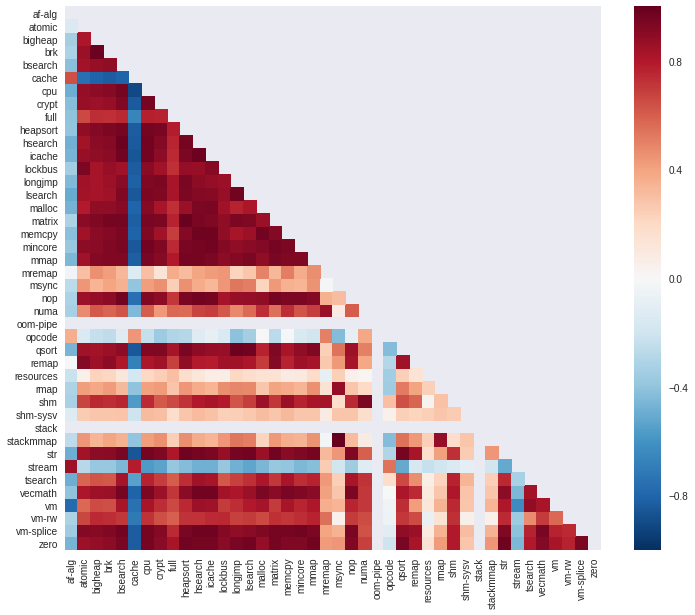

In [20]:
# plot correlation matrix for all stressors
corrmatrix = plot_corrmatrix(features[feature_columns])
plt.savefig('../../../paper/figures/corrmatrix.png', dpi=300, bbox_inches='tight')

In [21]:
["{} = {}".format(i, np.mean(np.abs(corrmatrix[i])) < .5) for i in corrmatrix.columns]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in absolute
  """Entry point for launching an IPython kernel.


['af-alg = True',
 'atomic = False',
 'bigheap = False',
 'brk = False',
 'bsearch = False',
 'cache = False',
 'cpu = False',
 'crypt = False',
 'full = False',
 'heapsort = False',
 'hsearch = False',
 'icache = False',
 'lockbus = False',
 'longjmp = False',
 'lsearch = False',
 'malloc = False',
 'matrix = False',
 'memcpy = False',
 'mincore = False',
 'mmap = False',
 'mremap = True',
 'msync = True',
 'nop = False',
 'numa = False',
 'oom-pipe = False',
 'opcode = True',
 'qsort = False',
 'remap = False',
 'resources = True',
 'rmap = True',
 'shm = False',
 'shm-sysv = True',
 'stack = False',
 'stackmmap = True',
 'str = False',
 'stream = True',
 'tsearch = False',
 'vecmath = False',
 'vm = False',
 'vm-rw = False',
 'vm-splice = False',
 'zero = False']

In [22]:
#memory_stressors = ['bigheap','brk','full','lockbus','malloc','mmap','mremap','msync','numa','resources','rmap','remap','shm','shm-sysv','stackmmap','stream','vm', 'vm-rw', 'vm-splice', 'zero']

#memory_stressors = ['mremap', 'msync', 'rmap', 'shm-sysv', 'stackmmap', 'stream']
#cpu_stressors = list(pd.Index(feature_columns).difference(memory_stressors))
#vm_stressors = []

cpu_stressors = ['af-alg', 'atomic', 'bsearch', 'context', 'cpu', 'cpu-online', 'crypt', 'fp-error', 'getrandom', 'heapsort', 'hsearch', 'longjmp', 'lsearch', 'matrix', 'mergesort', 'nop', 'numa', 'opcode', 'qsort', 'rdrand', 'str', 'stream', 'tsc', 'tsearch', 'vecmath', 'wcs', 'zlib']
memory_stressors = ['atomic', 'bsearch', 'context', 'full', 'heapsort', 'hsearch', 'lockbus', 'lsearch', 'malloc', 'matrix', 'membarrier', 'memcpy', 'memfd', 'mergesort', 'mincore', 'null', 'numa', 'oom-pipe', 'pipe', 'qsort', 'remap', 'resources', 'rmap', 'stack', 'stackmmap', 'str', 'stream', 'tlb-shootdown', 'tmpfs', 'tsearch', 'vm', 'vm-rw', 'wcs', 'zero', 'zlib']
vm_stressors = ['bigheap', 'brk', 'madvise', 'malloc', 'mlock', 'mmap', 'mmapfork', 'mmapmany', 'mremap', 'msync', 'shm', 'shm-sysv', 'stack', 'stackmmap', 'tmpfs', 'userfaultfd', 'vm', 'vm-rw', 'vm-splice']

In [23]:
memory_stressors

['atomic',
 'bsearch',
 'context',
 'full',
 'heapsort',
 'hsearch',
 'lockbus',
 'lsearch',
 'malloc',
 'matrix',
 'membarrier',
 'memcpy',
 'memfd',
 'mergesort',
 'mincore',
 'null',
 'numa',
 'oom-pipe',
 'pipe',
 'qsort',
 'remap',
 'resources',
 'rmap',
 'stack',
 'stackmmap',
 'str',
 'stream',
 'tlb-shootdown',
 'tmpfs',
 'tsearch',
 'vm',
 'vm-rw',
 'wcs',
 'zero',
 'zlib']

In [24]:
cpu_stressors

['af-alg',
 'atomic',
 'bsearch',
 'context',
 'cpu',
 'cpu-online',
 'crypt',
 'fp-error',
 'getrandom',
 'heapsort',
 'hsearch',
 'longjmp',
 'lsearch',
 'matrix',
 'mergesort',
 'nop',
 'numa',
 'opcode',
 'qsort',
 'rdrand',
 'str',
 'stream',
 'tsc',
 'tsearch',
 'vecmath',
 'wcs',
 'zlib']

In [25]:
rs = np.random.RandomState(1)
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(features[feature_columns])

In [26]:
dff = pd.DataFrame(z_data, columns=feature_columns)

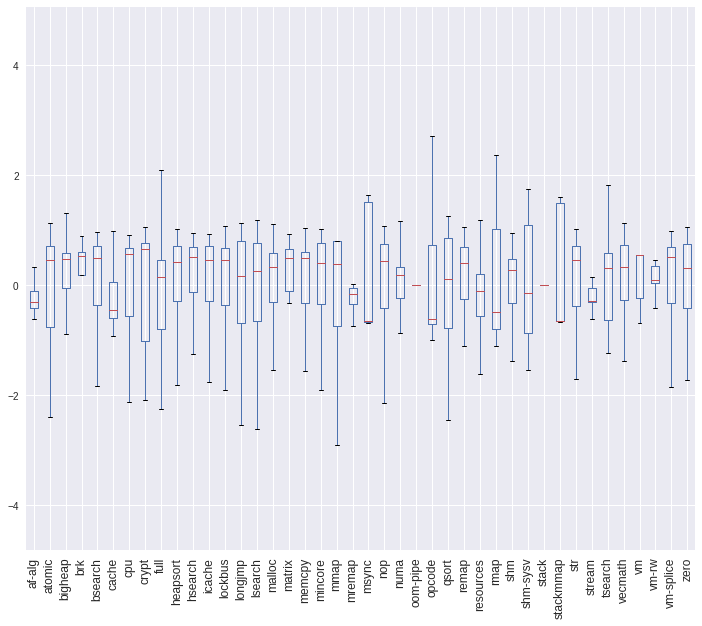

In [27]:
dff.boxplot()
_ = plt.xticks(rotation=90)

In [35]:
# gradient boosting regression
# taken from http://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html
# extended to normalize data

rs = np.random.RandomState(1)
z_scaler = StandardScaler()

def plot_importance(data, feats, apps):
    for b in apps:
        # normalize data
        z_data = z_scaler.fit_transform(data[feats])
        
        # fit using random forest regressor
        params = {'n_estimators': 1000, 'max_depth': 4, 'min_samples_split': 2,
                  'learning_rate': 0.01, 'loss': 'ls'}
        regr = GradientBoostingRegressor(**params)
        regr.fit(z_data, data[b])

        # Plot feature importance
        feature_importance = regr.feature_importances_
        # make importances relative to max importance
        feature_importance = 100.0 * (feature_importance / feature_importance.max())
        sorted_idx = np.argsort(feature_importance)
        pos = np.arange(sorted_idx.shape[0]) + .5
        plt.barh(pos, feature_importance[sorted_idx], align='center')
        plt.yticks(pos, np.array(feats)[sorted_idx])
        plt.xlabel('Relative Importance')
        plt.title(b)
        plt.show()

        # print aggregate importance for each class
        importances = pd.DataFrame({'feature':feats,'importance':np.round(feature_importance,3)})
        print('CPU: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @cpu_stressors')['importance'].values[0]))
        print('MEM: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @memory_stressors')['importance'].values[0]))
        print('VM: {}'.format(importances.sort_values(by='importance', ascending=False).query('feature in @vm_stressors')['importance'].values[0]))
        print('')

In [29]:
# taken from https://stackoverflow.com/a/5967539/389188
# {
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    '''
    return [ atoi(c) for c in re.split('(\d+)', text) ]
# }

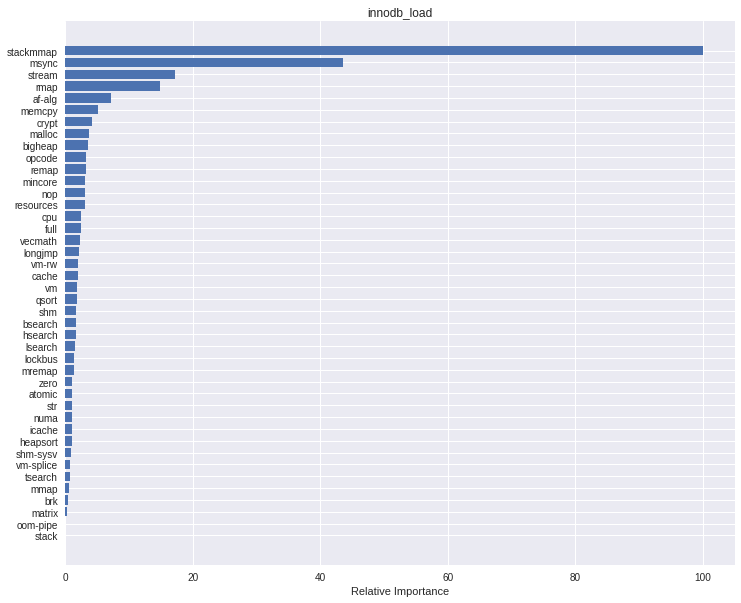

CPU: 17.255
MEM: 100.0
VM: 100.0



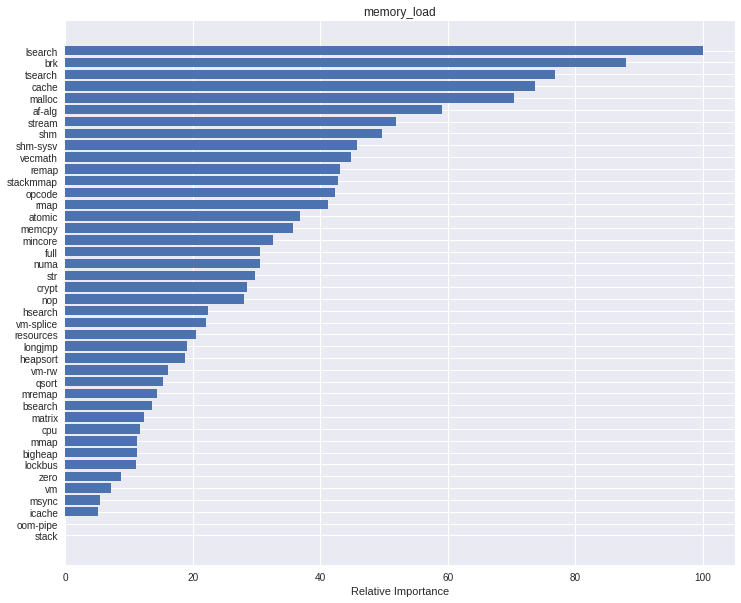

CPU: 100.0
MEM: 100.0
VM: 87.942



In [36]:
plot_importance(features, feature_columns, ['innodb_load', 'memory_load'])

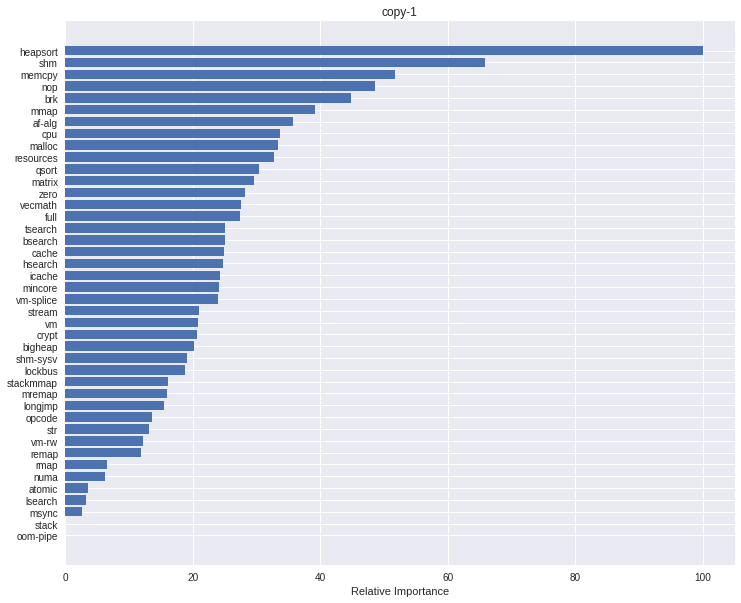

CPU: 100.0
MEM: 100.0
VM: 65.859



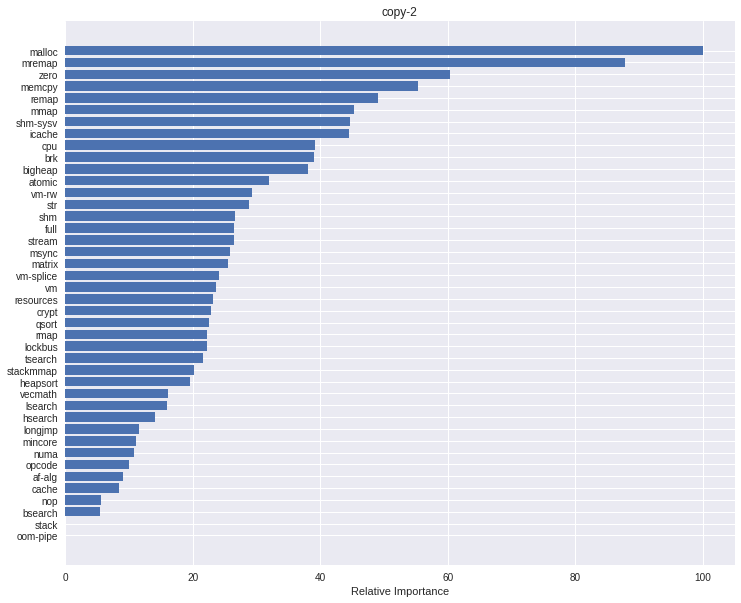

CPU: 39.157
MEM: 100.0
VM: 100.0



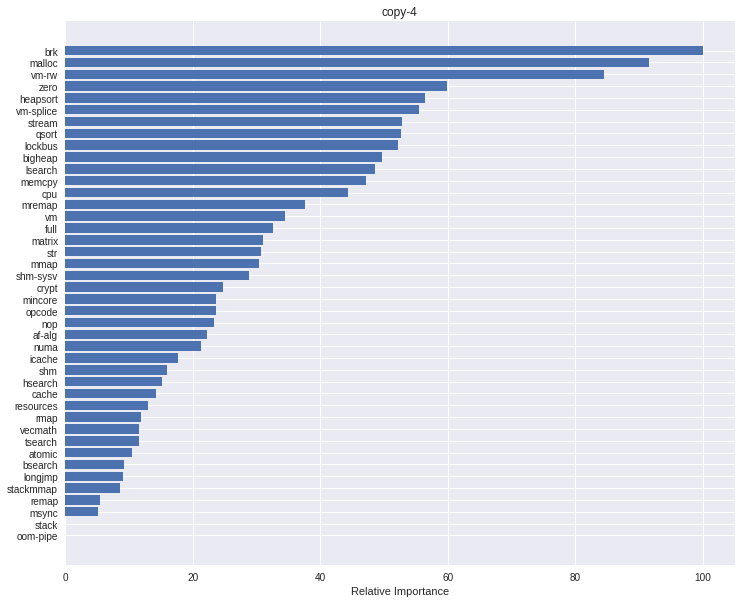

CPU: 56.514
MEM: 91.607
VM: 100.0



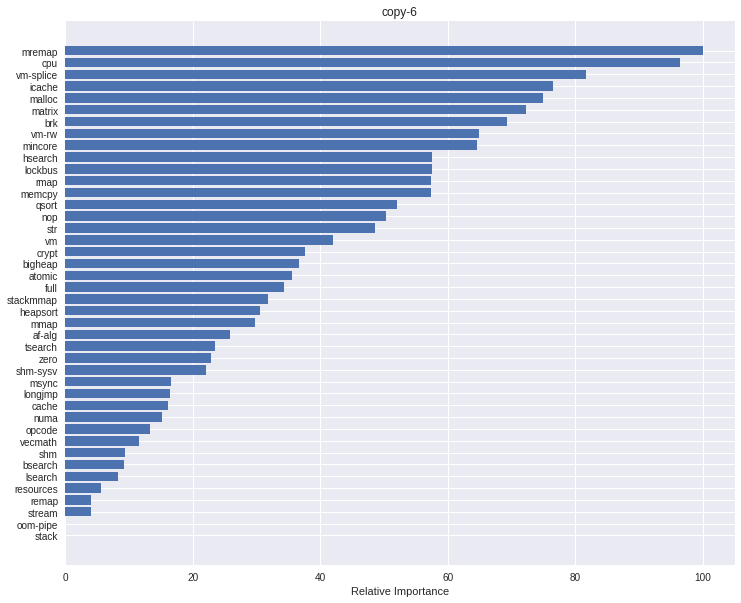

CPU: 96.453
MEM: 74.965
VM: 100.0



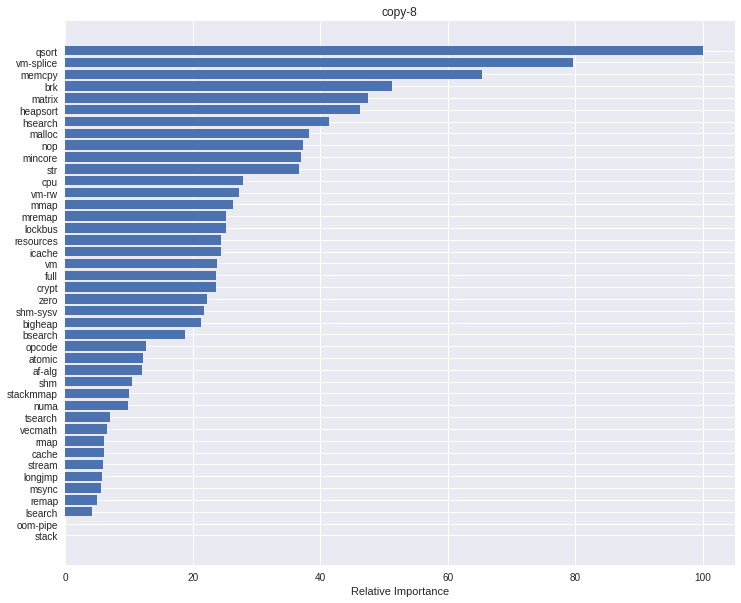

CPU: 100.0
MEM: 100.0
VM: 79.65



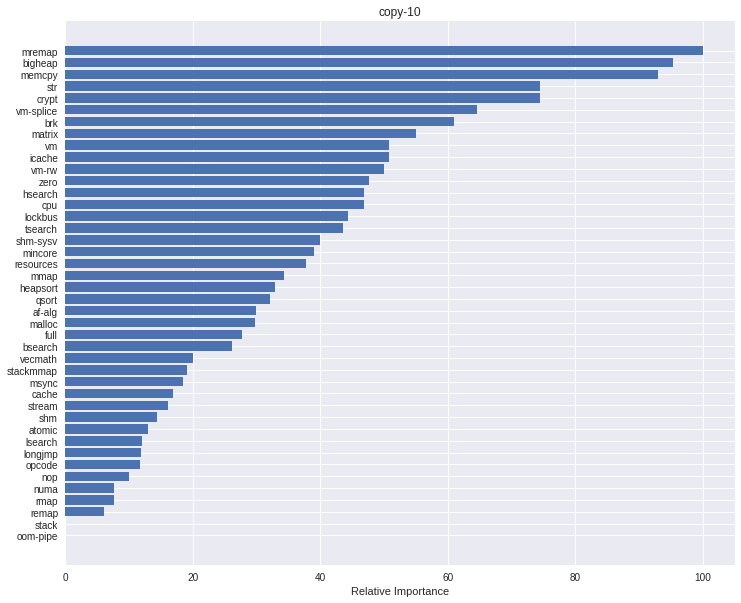

CPU: 74.459
MEM: 93.044
VM: 100.0



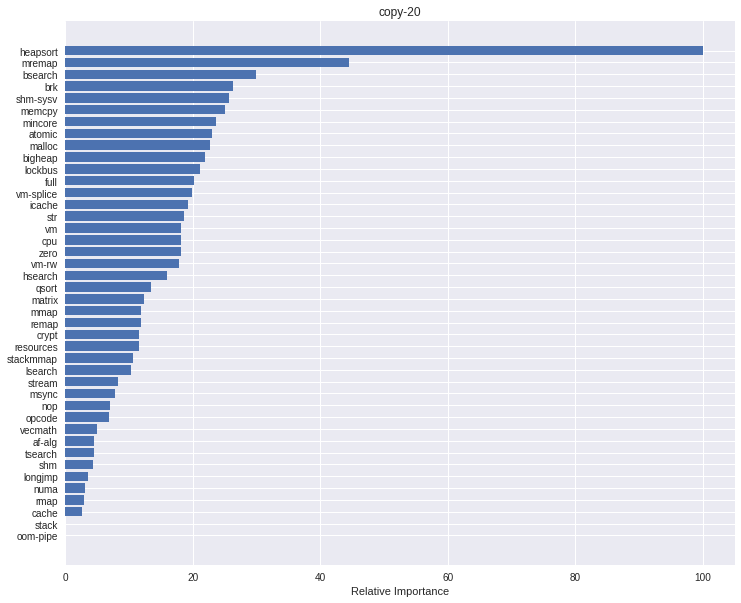

CPU: 100.0
MEM: 100.0
VM: 44.49



In [108]:
plot_importance(features, feature_columns, ['copy-1'] + ['copy-2'] + ['copy-4'] + ['copy-6'] + ['copy-8'] + ['copy-10'] + ['copy-20'])

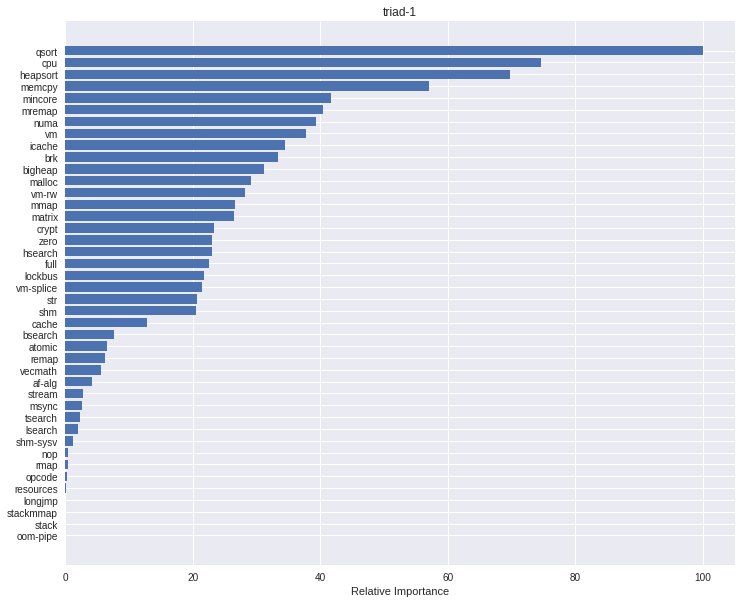

CPU: 100.0
MEM: 100.0
VM: 40.431



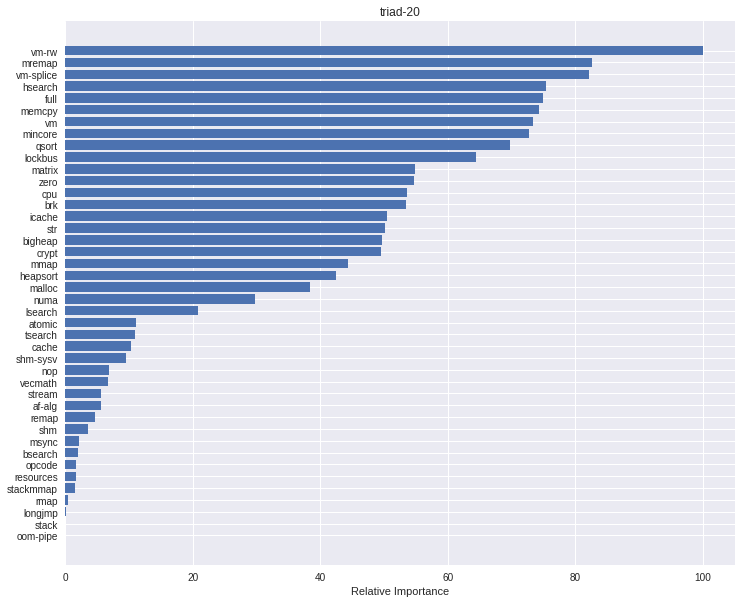

CPU: 75.44
MEM: 100.0
VM: 100.0



In [282]:
plot_importance(features, feature_columns, ['triad-1'] + ['triad-20'])

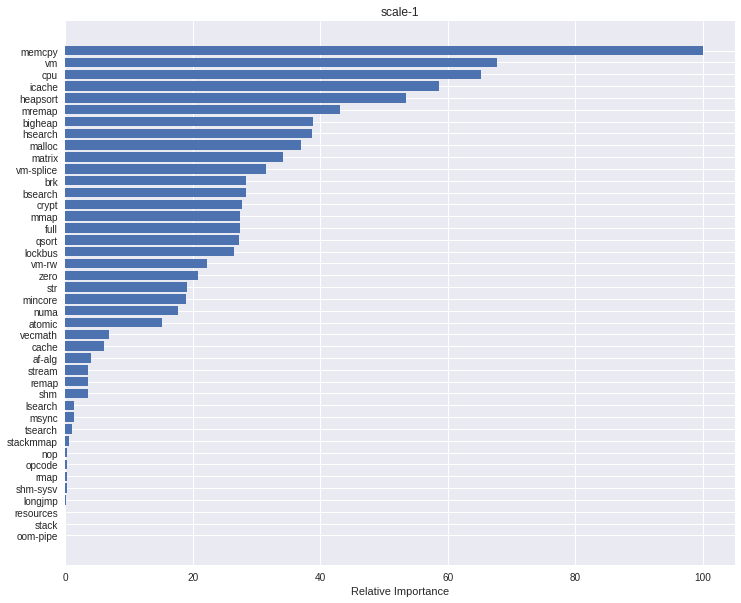

CPU: 65.147
MEM: 100.0
VM: 67.652



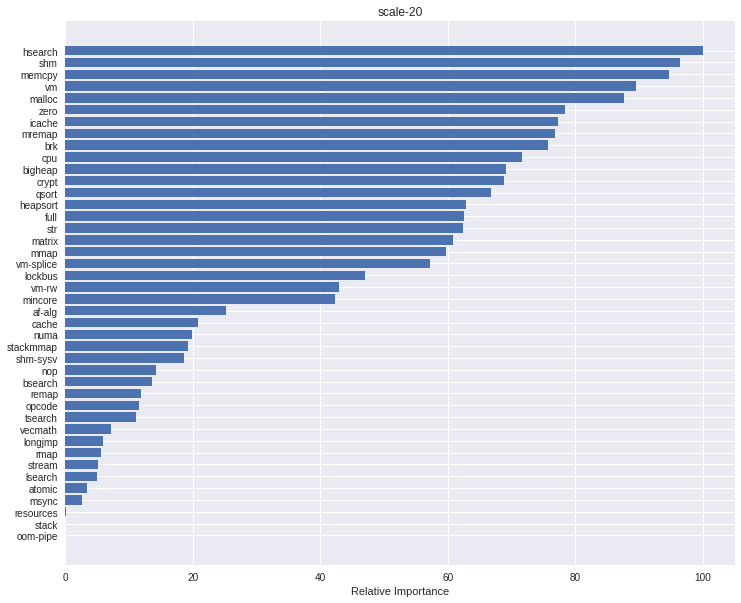

CPU: 100.0
MEM: 100.0
VM: 96.416



In [283]:
plot_importance(features, feature_columns, ['scale-1', 'scale-20'])

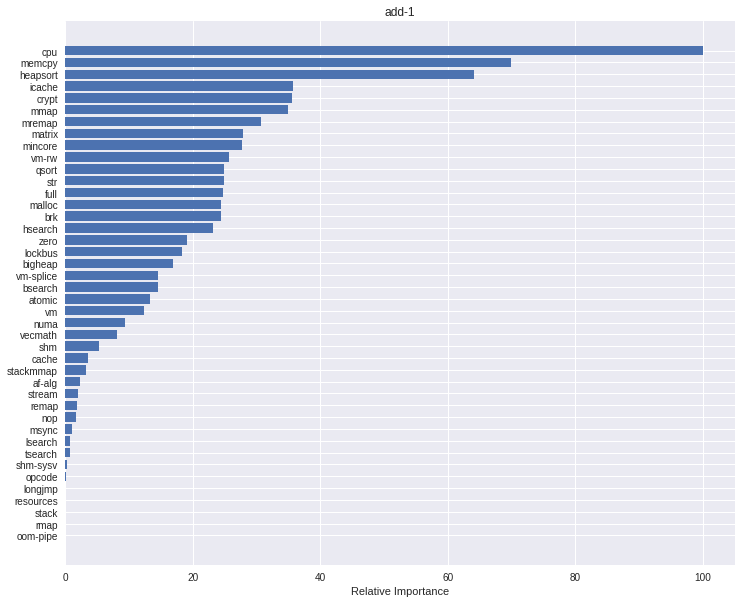

CPU: 100.0
MEM: 69.932
VM: 34.956



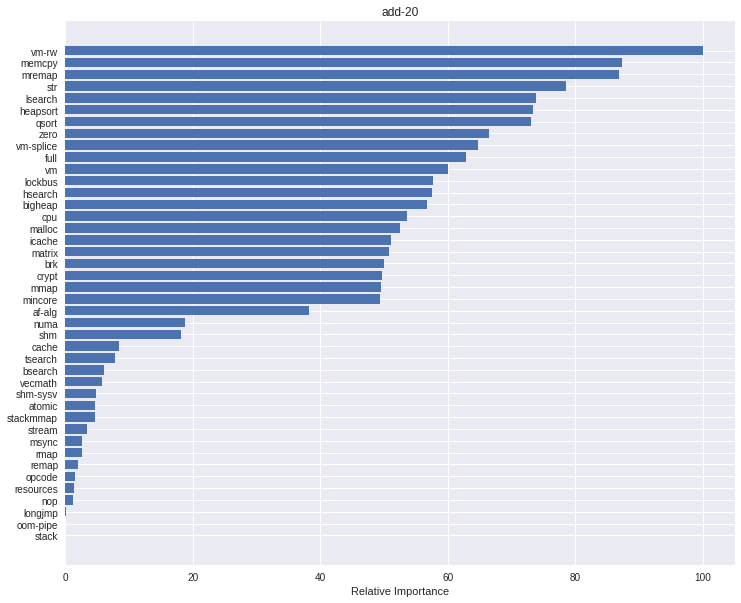

CPU: 78.583
MEM: 100.0
VM: 100.0



In [284]:
plot_importance(features, feature_columns, ['add-1'] + ['add-20'])

(0.0001, 100)

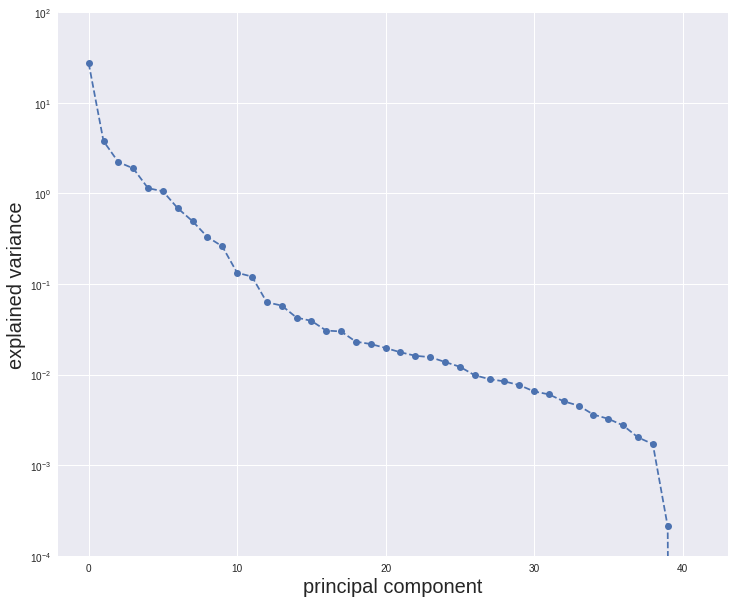

In [100]:
# taken from http://jotterbach.github.io/2016/03/24/Principal_Component_Analysis/
#            https://github.com/jotterbach/Data-Exploration-and-Numerical-Experimentation/blob/master/Data-Analytics/PCA_Pitfalls.ipynb
z_scaler = StandardScaler()
z_data = z_scaler.fit_transform(features[feature_columns])
pca_stressors_norm = PCA().fit(z_data)
plt.semilogy(pca_stressors_norm.explained_variance_, '--o')
plt.xlabel('principal component', fontsize = 20);
plt.ylabel('explained variance', fontsize = 20);
plt.ylim([.0001,100])

In [305]:
df.machine.unique()

array(['c220g1.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho2.schedock-PG0.apt.emulab.net',
       'c6320.quiho2.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho2.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho2.Schedock.emulab.net',
       'd430.quiho2.Schedock.emulab.net',
       'd530.quiho2.Schedock.emulab.net',
       'd710.quiho2.Schedock.emulab.net',
       'd820.quiho2.Schedock.emulab.net',
       'dl360.quiho2.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-41',
       'm510.quiho2.schedock-PG0.utah.cloudlab.us',
       'pc3000.quiho2.Schedock.emulab.net',
       'pc3300.quiho2.emulab-net.uky.emulab.net',
       'pc3400.quiho2.emulab-net.uky.emulab.net',
       'pc3500.quiho2.emulab-net.uky.emulab.net',
       'r320.quiho2.schedock-PG0.apt.emulab.net',
       'r720.quiho2.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu'], dtype=object)

In [315]:
df.machine.unique()

array(['c220g1.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c220g2.quiho2.schedock-PG0.wisc.cloudlab.us',
       'c6220.quiho2.schedock-PG0.apt.emulab.net',
       'c6320.quiho2.schedock-PG0.clemson.cloudlab.us',
       'c8220.quiho2.schedock-PG0.clemson.cloudlab.us',
       'd2100.quiho2.Schedock.emulab.net',
       'd430.quiho2.Schedock.emulab.net',
       'd530.quiho2.Schedock.emulab.net',
       'd710.quiho2.Schedock.emulab.net',
       'd820.quiho2.Schedock.emulab.net',
       'dl360.quiho2.emulab-net.utahddc.geniracks.net',
       'dwill.soe.ucsc.edu', 'issdm-41',
       'm510.quiho2.schedock-PG0.utah.cloudlab.us',
       'pc3000.quiho2.Schedock.emulab.net',
       'pc3300.quiho2.emulab-net.uky.emulab.net',
       'pc3400.quiho2.emulab-net.uky.emulab.net',
       'pc3500.quiho2.emulab-net.uky.emulab.net',
       'r320.quiho2.schedock-PG0.apt.emulab.net',
       'r720.quiho2.schedock-PG0.apt.emulab.net', 'scruffy.soe.ucsc.edu'], dtype=object)

In [1]:
sns.boxplot(x='test', y='result', data=features[.query('benchmark == "stressng"'))
_ = plt.xticks(rotation=90)

NameError: name 'sns' is not defined

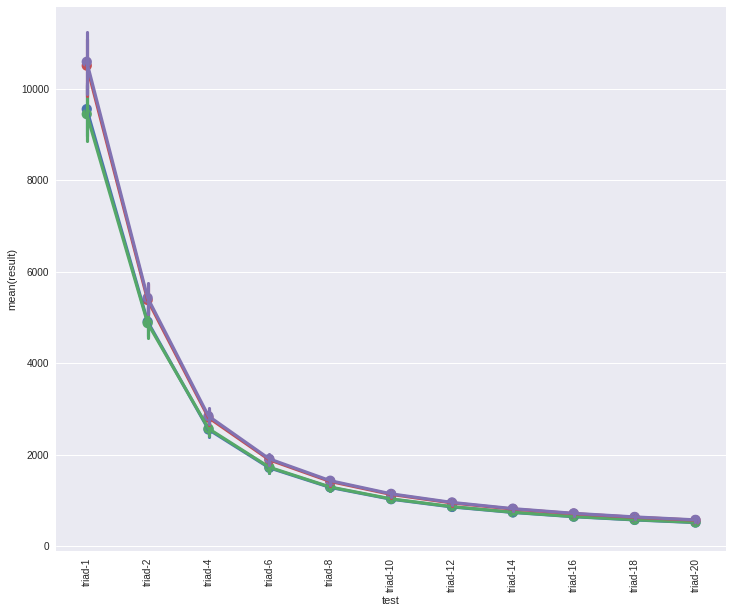

In [320]:
ops = ['copy', 'scale', 'add', 'triad']
for streamop in ops:
    sns.pointplot(x='test', color='C{}'.format(ops.index(streamop)), y='result', data=df[df['test'].str.startswith(streamop)].query('benchmark == "stream"'), order=['{}-1'.format(streamop)] + ['{}-{}'.format(streamop, i) for i in range(2,22,2)])
    plt.xticks(rotation=90)

(0.0001, 100)

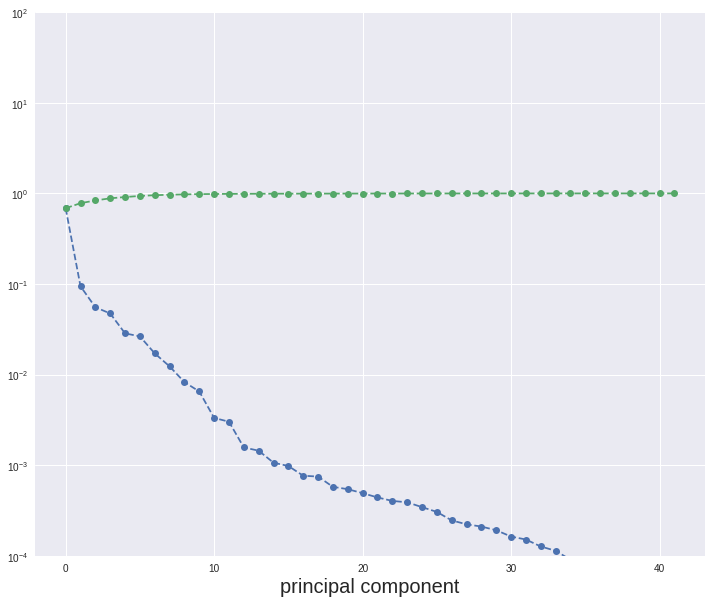

In [101]:
plt.semilogy(pca_stressors_norm.explained_variance_ratio_, '--o');
plt.semilogy(pca_stressors_norm.explained_variance_ratio_.cumsum(), '--o');
plt.xlabel('principal component', fontsize = 20);
plt.ylim([.0001,100])

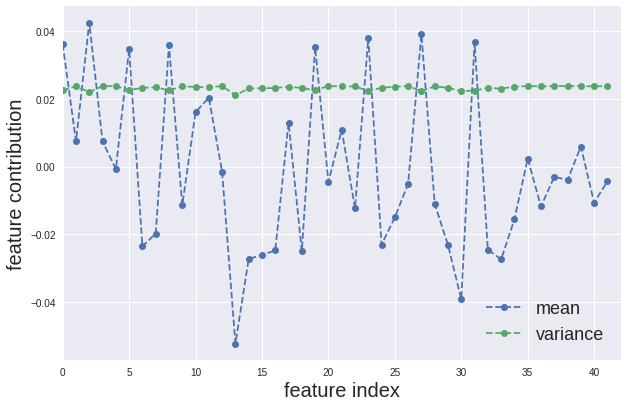

In [137]:
n_comp = len(feature_columns)
pca_inv_data = pca_stressors_norm.inverse_transform(np.eye(n_comp))
fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=20);
plt.xlabel('feature index', fontsize=20);
plt.tick_params(axis='both', which='major');
plt.tick_params(axis='both', which='minor');
plt.xlim([0, len(feature_columns)])
plt.legend(loc='lower right', fontsize=18)

In [152]:
# show indices where mean of variance is greater than a threshold
mean_threshold=0.035
np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)

(array([ 0,  2,  8, 13, 19, 23, 27, 30, 31]),)

In [145]:
# show which stressors they correspond to
most_relevant = list(np.array(feature_columns)[np.where(np.abs(pca_inv_data.mean(axis=0)) > mean_threshold)])
most_relevant

['af-alg',
 'bigheap',
 'full',
 'longjmp',
 'mmap',
 'numa',
 'remap',
 'shm',
 'shm-sysv']

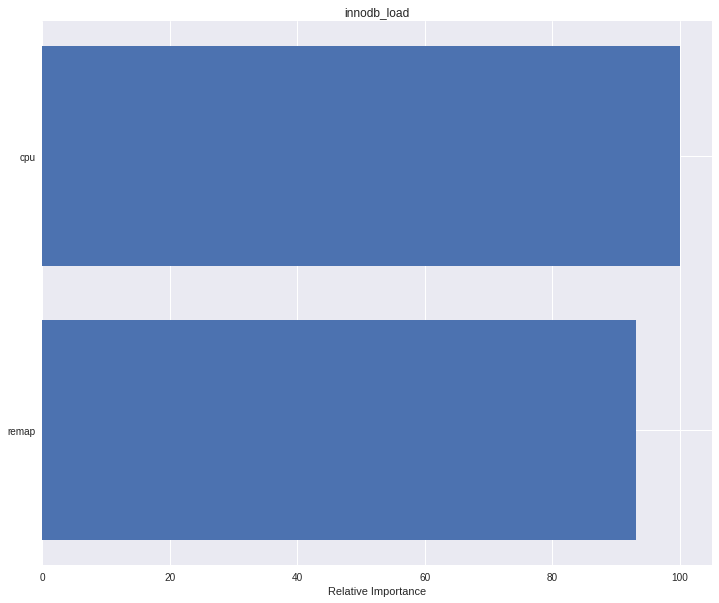

CPU: 193.079
MEM: 0
VM: 0



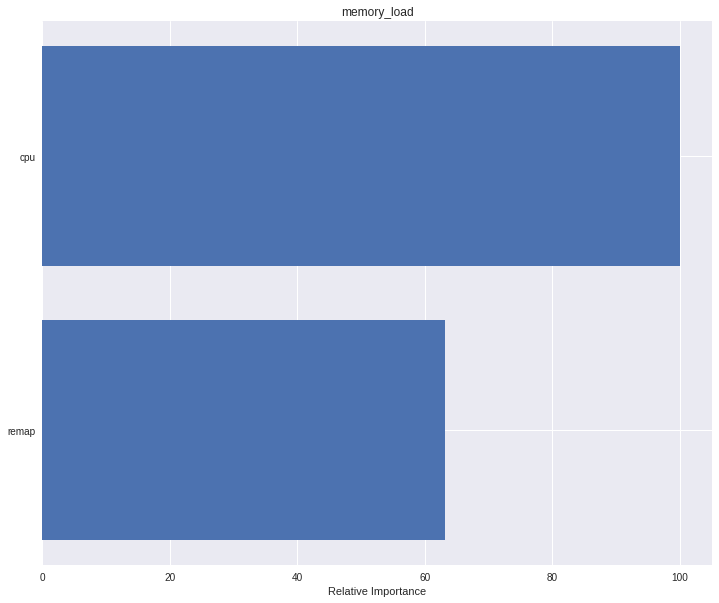

CPU: 163.173
MEM: 0
VM: 0



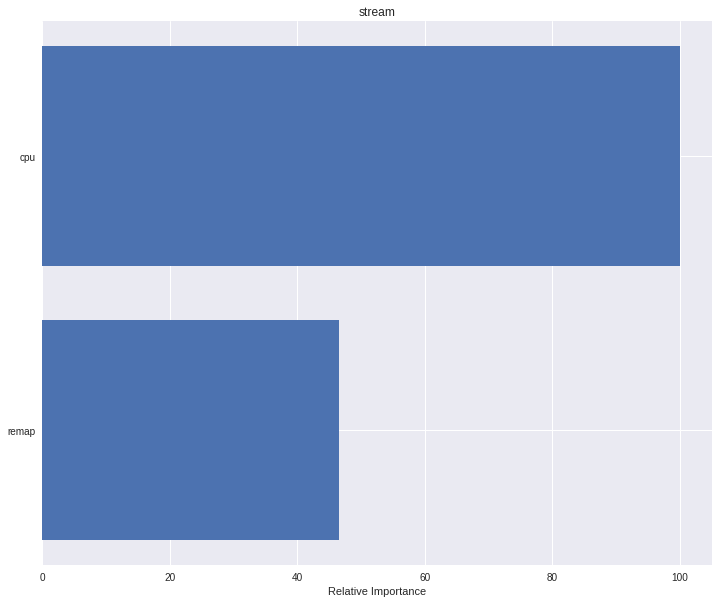

CPU: 146.453
MEM: 0
VM: 0



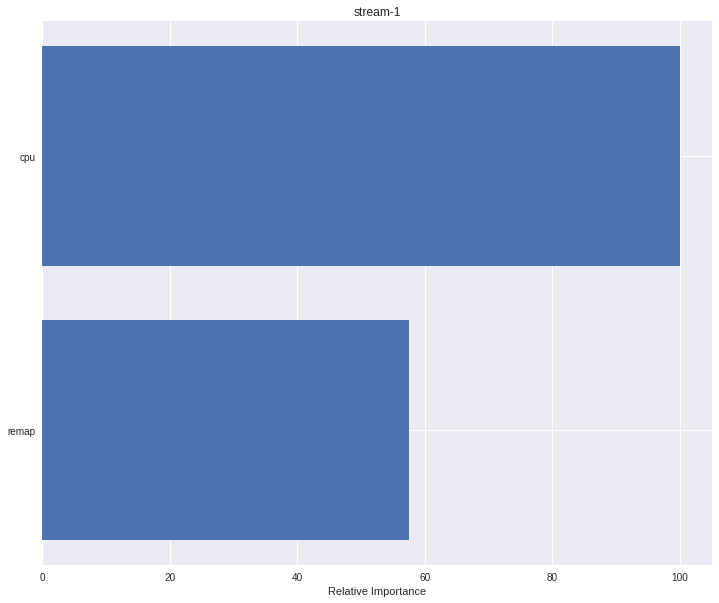

CPU: 157.496
MEM: 0
VM: 0



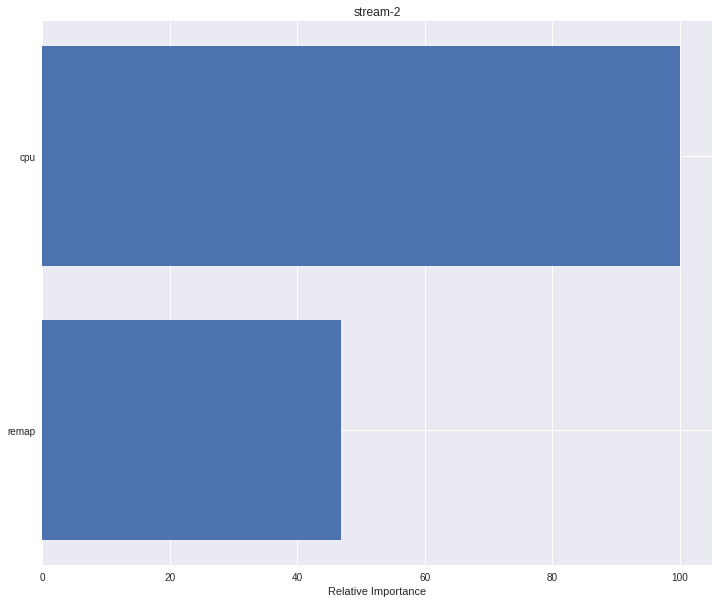

CPU: 146.852
MEM: 0
VM: 0



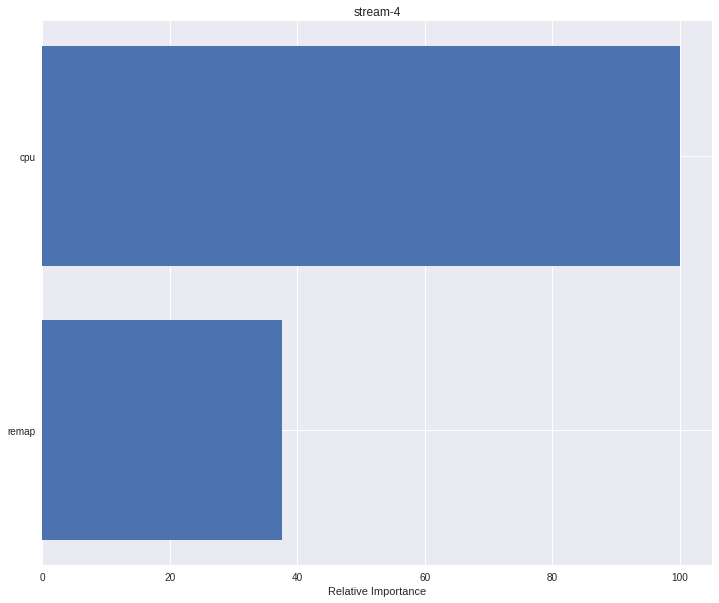

CPU: 137.602
MEM: 0
VM: 0



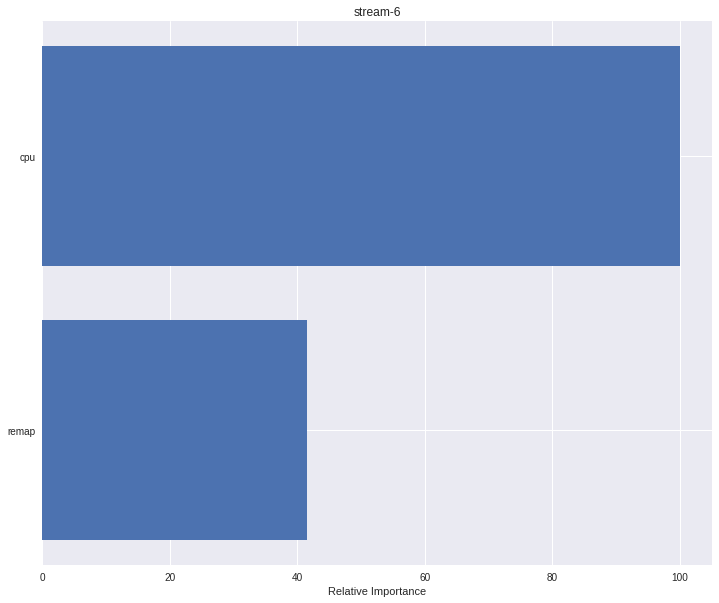

CPU: 141.448
MEM: 0
VM: 0



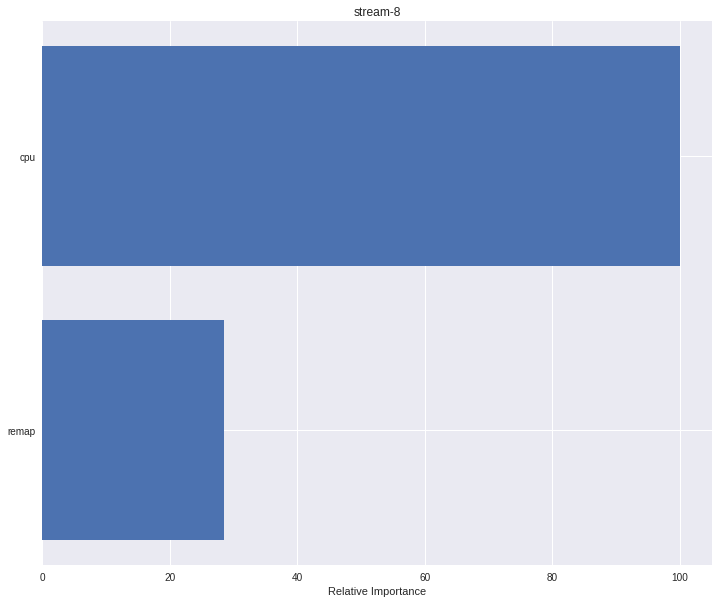

CPU: 128.502
MEM: 0
VM: 0



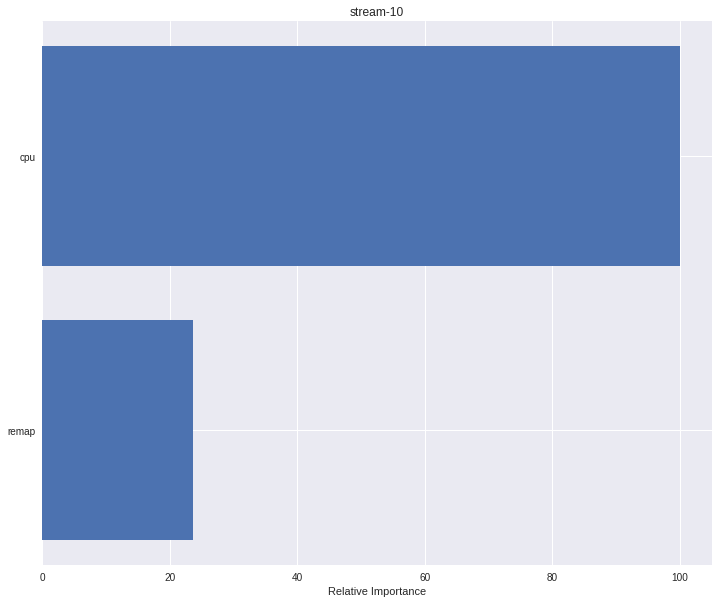

CPU: 123.676
MEM: 0
VM: 0



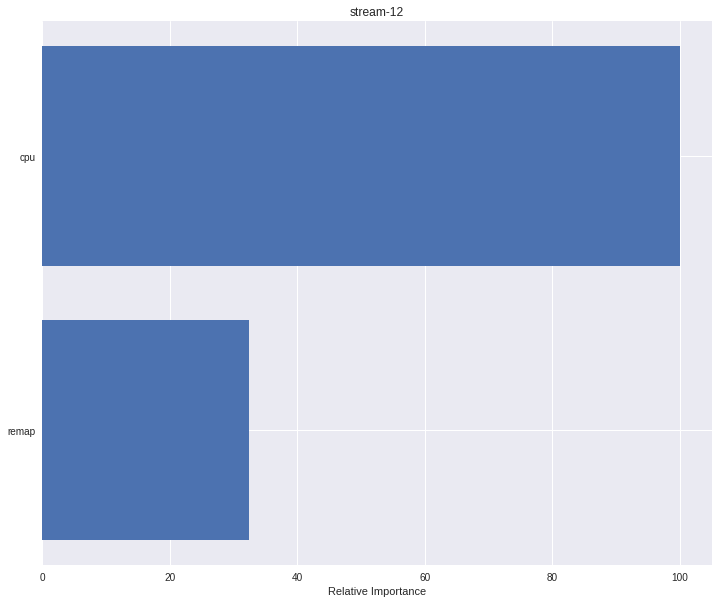

CPU: 132.336
MEM: 0
VM: 0



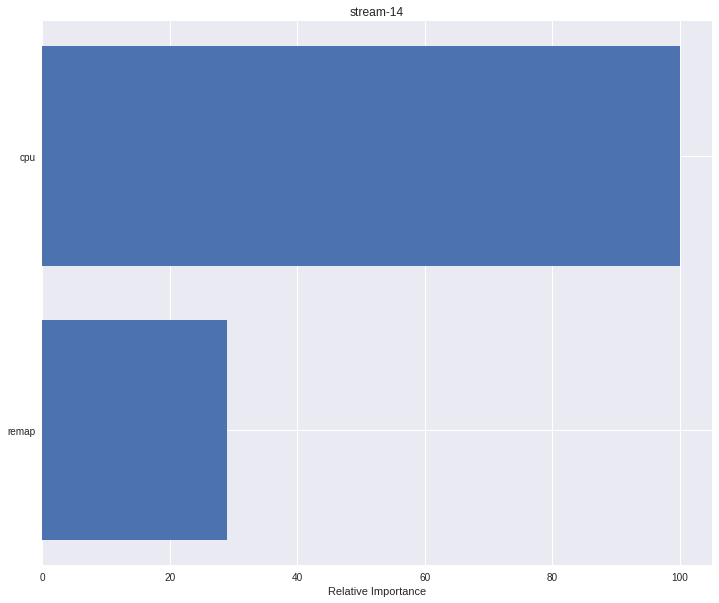

CPU: 128.984
MEM: 0
VM: 0



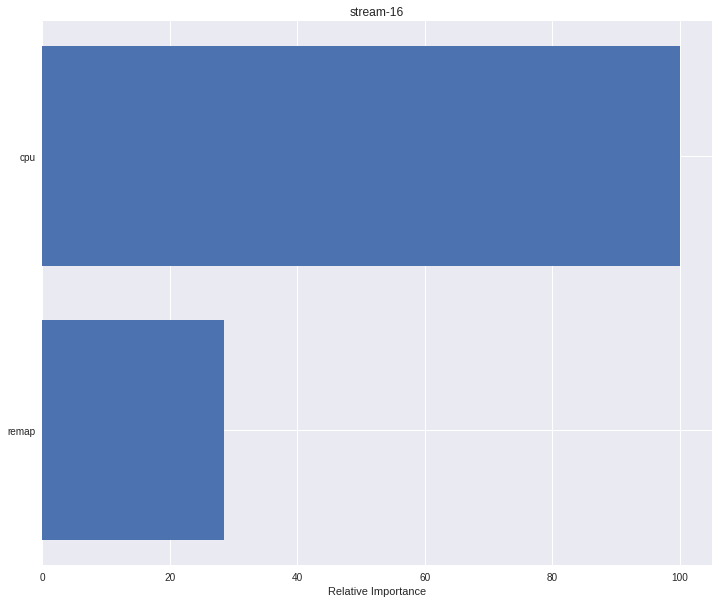

CPU: 128.47899999999998
MEM: 0
VM: 0



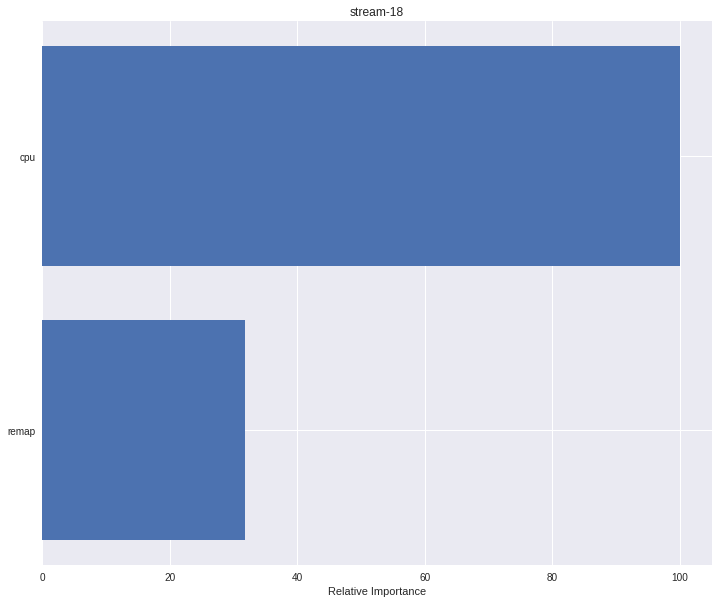

CPU: 131.822
MEM: 0
VM: 0



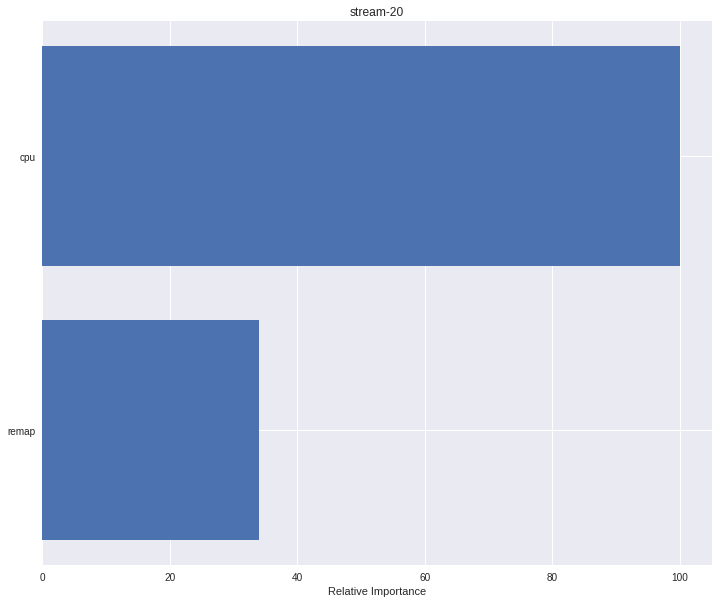

CPU: 133.985
MEM: 0
VM: 0



In [155]:
# let's plot feature importance again, this time using only the most relevant features from above
plot_importance(features, ['remap', 'cpu'], apps)

In [ ]:
df_mpi = 